<Figure size 1500x1000 with 0 Axes>

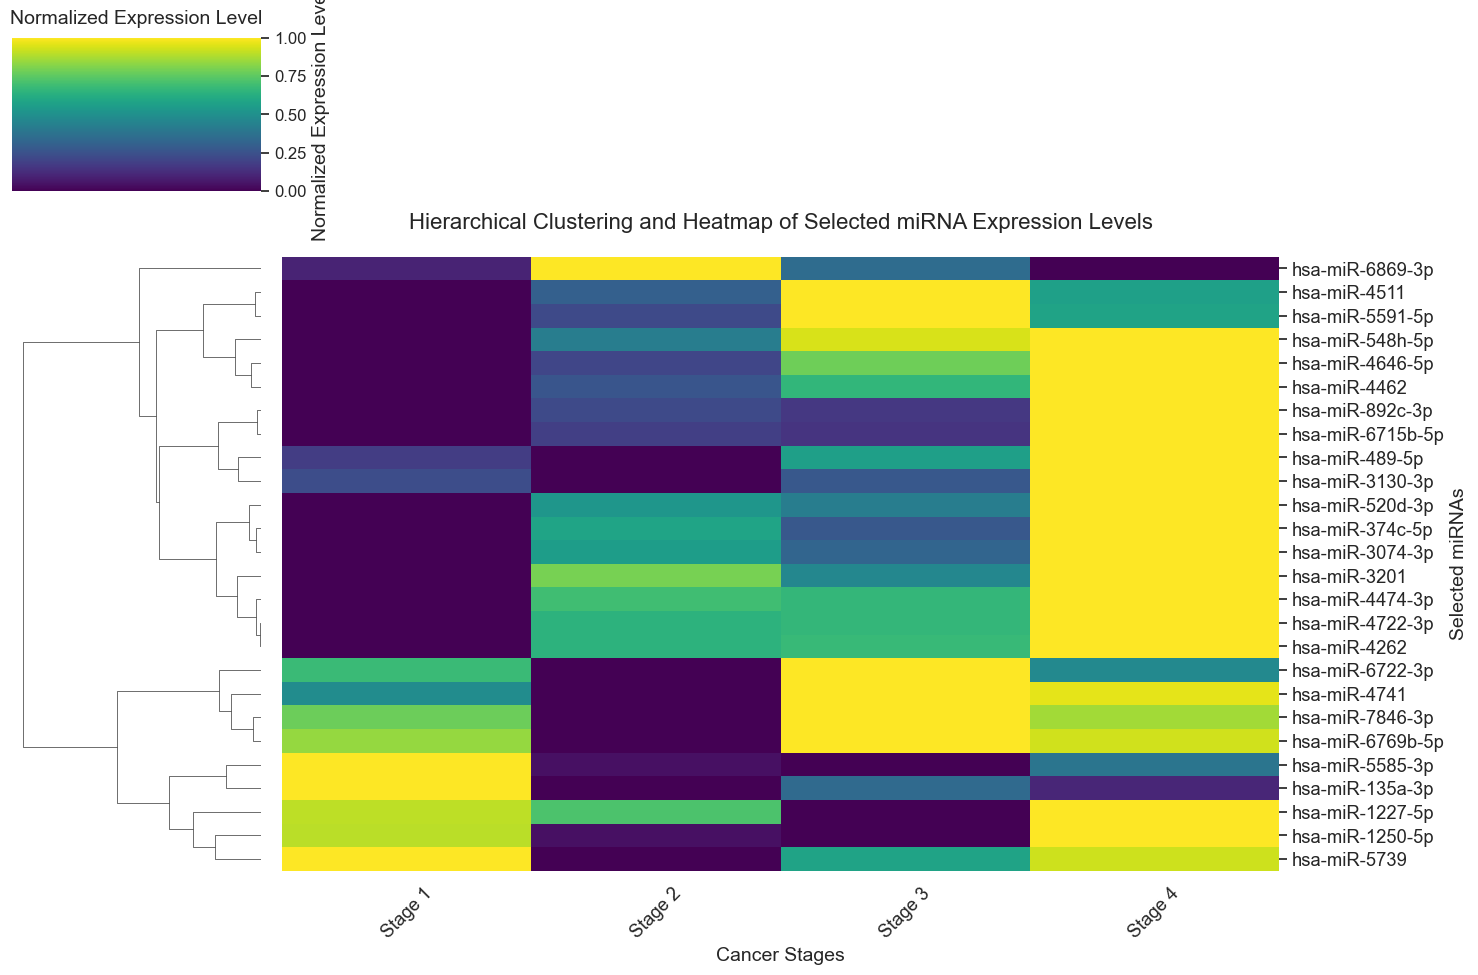

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage

# Load the feature files and combine the features
features_s1_s2 = pd.read_csv('../GSEA/miRNA/s1_s2_miRNA.csv')['Feature'].tolist()
features_s2_s3 = pd.read_csv('../GSEA/miRNA/s2_s3_miRNA.csv')['Feature'].tolist()
features_s3_s4 = pd.read_csv('../GSEA/miRNA/s3_s4_miRNA.csv')['Feature'].tolist()

# Remove prefixes
features_s1_s2 = [feature.split('_', 1)[-1] for feature in features_s1_s2]
features_s2_s3 = [feature.split('_', 1)[-1] for feature in features_s2_s3]
features_s3_s4 = [feature.split('_', 1)[-1] for feature in features_s3_s4]

all_selected_features = list(set(features_s1_s2 + features_s2_s3 + features_s3_s4))

# Load and prepare the original stage data
stage_1_samples = pd.read_csv('../data/cancer/stage_1_prostate_cancer_samples.csv')
stage_2_samples = pd.read_csv('../data/cancer/stage_2_prostate_cancer_samples.csv')
stage_3_samples = pd.read_csv('../data/cancer/stage_3_prostate_cancer_samples.csv')
stage_4_samples = pd.read_csv('../data/cancer/stage_4_prostate_cancer_samples.csv')

# Add stage column for easier concatenation
stage_1_samples['Stage'] = 'Stage 1'
stage_2_samples['Stage'] = 'Stage 2'
stage_3_samples['Stage'] = 'Stage 3'
stage_4_samples['Stage'] = 'Stage 4'

# Combine all stages data
combined_data = pd.concat([stage_1_samples, stage_2_samples, stage_3_samples, stage_4_samples], ignore_index=True)

# Ensure only numeric columns are used
numeric_columns = combined_data.columns.drop(['Sample_ID', 'Sex', 'Age', 'Stage', 'Disease'])

# Calculate the average expression levels for each miRNA for each stage
average_expression = combined_data.groupby('Stage')[numeric_columns].mean().T

# Extract the selected features from the average expression data
selected_expression = average_expression.loc[all_selected_features]

# Normalize each miRNA across stages
normalized_expression = selected_expression.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Define a threshold for significant change in normalized expression levels
threshold = 0.5 # Adjust this value as needed

# Filter miRNAs that show significant changes in normalized expression levels
miRNAs_with_changes = normalized_expression.loc[(normalized_expression.max(axis=1) - normalized_expression.min(axis=1)) > threshold]

# Perform hierarchical clustering on the filtered data
linked = linkage(miRNAs_with_changes, method='ward')

# Create a heatmap with dendrogram
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)
clustermap = sns.clustermap(miRNAs_with_changes, row_linkage=linked, col_cluster=False, cmap='viridis', figsize=(15, 10))

# Enhance the heatmap
clustermap.ax_heatmap.set_title('Hierarchical Clustering and Heatmap of Selected miRNA Expression Levels', fontsize=16, pad=20)
clustermap.ax_heatmap.set_xlabel('Cancer Stages', fontsize=14)
clustermap.ax_heatmap.set_ylabel('Selected miRNAs', fontsize=14)
clustermap.ax_heatmap.tick_params(axis='x', rotation=45)

# Add color bar legend with a title
cbar = clustermap.ax_heatmap.collections[0].colorbar
cbar.set_label('Normalized Expression Level', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set color bar title
cbar.ax.set_title('Normalized Expression Level', fontsize=14, pad=10)

plt.tight_layout()

# Save the figure
plt.savefig('../GSEA/miRNA/heatmap_clustering_normalized.png')
plt.show()

***Machine Learning Feature Importance:*** In models like SVM and XGBoost, feature importance is derived based on how much a feature (miRNA) contributes to improving the model's accuracy. This might include miRNAs that are part of complex multi-feature interactions.

***Statistical Significance:*** Differential expression analysis uses statistical tests to identify miRNAs with significant changes in expression. This approach is sensitive to large, consistent changes in expression levels.

***Complex Relationships:*** Machine learning can capture intricate patterns that might be overlooked by DEA, providing a more holistic view of feature relevance in a predictive context.